<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.821177  32.628243  40.152353  ...  121.601528  121.601617 -0.000089
      1.0    68.477009  84.476629  54.363894  ...  217.317793  217.317554  0.000239
      2.0    22.261859  83.135061  88.759347  ...  204.155951  204.156166 -0.000215
      3.0    74.824482  84.625636  66.577499  ...  236.027572  236.027795 -0.000222
      4.0    69.160169  60.625512  70.465660  ...  210.251171  210.251595 -0.000424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.510733  44.679858  34.252478  ...  146.443959  146.442501  0.001458
      56.0   40.117201  84.149688  99.701160  ...  233.967940  233.968906 -0.000966
      57.0   24.655895  66.287601  53.278781  ...  154.222195  154.222899 -0.000704
      58.0   60.411761  30.995031  72.315206  ...  173.723046  173.721594  0.001453
      59.0   74.764585  28.096142  43.815382  ...  156.670702  156.675052 -0.004349

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.821177  32.628243  40.152353  ...  121.601528  121.601617 -0.000089
      1.0    68.477009  84.476629  54.363894  ...  217.317793  217.317554  0.000239
      2.0    22.261859  83.135061  88.759347  ...  204.155951  204.156166 -0.000215
      3.0    74.824482  84.625636  66.577499  ...  236.027572  236.027795 -0.000222
      4.0    69.160169  60.625512  70.465660  ...  210.251171  210.251595 -0.000424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.510733  44.679858  34.252478  ...  146.443959  146.442501  0.001458
      56.0   40.117201  84.149688  99.701160  ...  233.967940  233.968906 -0.000966
      57.0   24.655895  66.287601  53.278781  ...  154.222195  154.222899 -0.000704
      58.0   60.411761  30.995031  72.315206  ...  173.723046  173.721594  0.001453
      59.0   74.764585  28.096142  43.815382  ...  156.670702  156.675052 -0.004349

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.821177,32.628243,40.152353,-0.000245,121.601528,121.601617,-0.000089
1,0.0,1.0,68.477009,84.476629,54.363894,0.000260,217.317793,217.317554,0.000239
2,0.0,2.0,22.261859,83.135061,88.759347,-0.000316,204.155951,204.156166,-0.000215
3,0.0,3.0,74.824482,84.625636,66.577499,-0.000044,236.027572,236.027795,-0.000222
4,0.0,4.0,69.160169,60.625512,70.465660,-0.000170,210.251171,210.251595,-0.000424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.510733,44.679858,34.252478,0.000889,146.443959,146.442501,0.001458
59996,999.0,56.0,40.117201,84.149688,99.701160,-0.000109,233.967940,233.968906,-0.000966
59997,999.0,57.0,24.655895,66.287601,53.278781,-0.000081,154.222195,154.222899,-0.000704
59998,999.0,58.0,60.411761,30.995031,72.315206,0.001048,173.723046,173.721594,0.001453


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    38.821177  32.628243  40.152353  ...  121.601528  121.601617 -0.000089
      1.0    68.477009  84.476629  54.363894  ...  217.317793  217.317554  0.000239
      2.0    22.261859  83.135061  88.759347  ...  204.155951  204.156166 -0.000215
      3.0    74.824482  84.625636  66.577499  ...  236.027572  236.027795 -0.000222
      4.0    69.160169  60.625512  70.465660  ...  210.251171  210.251595 -0.000424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.510733  44.679858  34.252478  ...  146.443959  146.442501  0.001458
      56.0   40.117201  84.149688  99.701160  ...  233.967940  233.968906 -0.000966
      57.0   24.655895  66.287601  53.278781  ...  154.222195  154.222899 -0.000704
      58.0   60.411761  30.995031  72.315206  ...  173.723046  173.721594  0.001453
      59.0   74.764585  28.096142  43.815382  ...  156.670702  156.675052 -0.004349

[60000 rows x 7 columns]

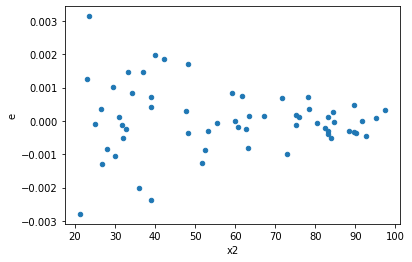

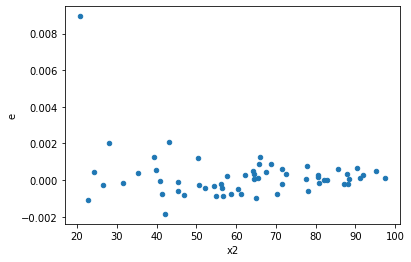

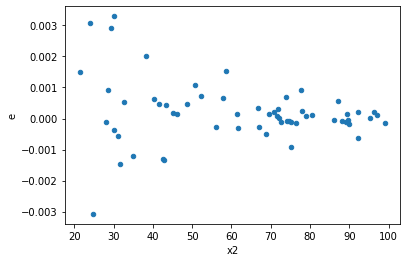

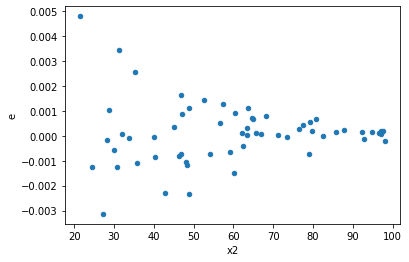

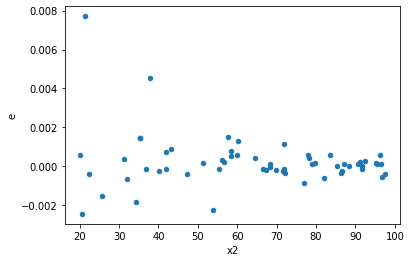

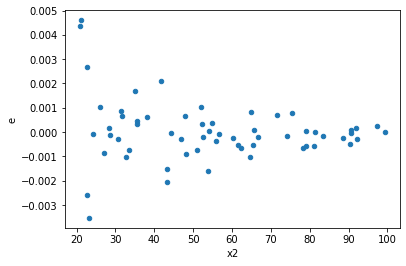

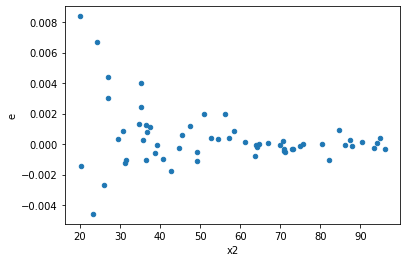

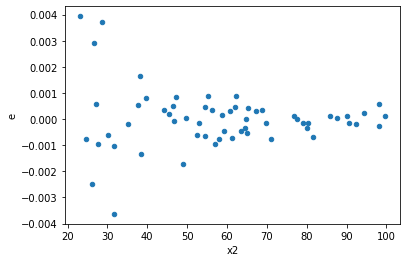

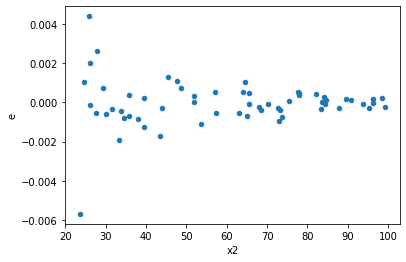

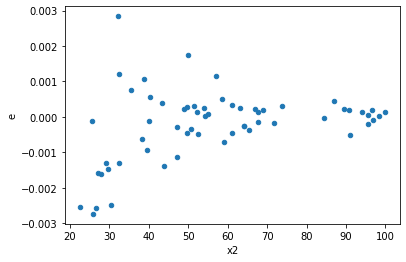

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,35.0,19.0,2.3329409896235155e-05,3.36494240997035e-05,6.665545684638615e-07,1.7710223210370262e-06,2.6569802456211735,0.026624966650065307,0.9866875166749673,0.013312483325032654,Reject001=1 : Homoscedasticity
4.0,31.0,23.0,3.4225493342003315e-05,4.299640029745137e-05,1.1040481723226876e-06,1.869408708584842e-06,1.6932311066210048,0.1946104420542587,0.9026947789728706,0.09730522102712935,Reject001=1 : Homoscedasticity
7.0,25.0,29.0,2.030519620843143e-05,4.975884407092639e-05,8.122078483372572e-07,1.7158222093422891e-06,2.112540789718914,0.054214797205828,0.972892601397086,0.027107398602914,Reject001=1 : Homoscedasticity
8.0,31.0,23.0,6.800255748658446e-06,7.523011838783035e-05,2.1936308866640148e-07,3.270874712514363e-06,14.910779805296126,5.455371265838949e-09,0.9999999972723144,2.7276856329194743e-09,Reject001=0 : Heteroscedasticity
9.0,28.0,26.0,1.2128892663466733e-05,3.277801922363808e-05,4.3317473798095477e-07,1.260693047063003e-06,2.910356806445235,0.0076774733310251975,0.9961612633344874,0.0038387366655125987,Reject001=0 : Heteroscedasticity
15.0,28.0,26.0,6.29339726378286e-06,6.47281679514169e-05,2.24764187992245e-07,2.4895449212083424e-06,11.076252598097339,2.807540866456293e-08,0.9999999859622957,1.4037704332281464e-08,Reject001=0 : Heteroscedasticity
18.0,32.0,22.0,5.011574520171869e-06,4.554046492730509e-05,1.5661170375537091e-07,2.0700211330593224e-06,13.217537919724803,3.331879661061521e-08,0.9999999833406017,1.6659398305307604e-08,Reject001=0 : Heteroscedasticity
20.0,26.0,28.0,2.2663983060426604e-05,0.00015447092995871017,8.71691656170254e-07,5.516818927096791e-06,6.328865130285561,6.392547085232181e-06,0.9999968037264574,3.1962735426160904e-06,Reject001=0 : Heteroscedasticity
21.0,20.0,34.0,1.9766402808541137e-05,0.000158854833950805,9.883201404270568e-07,4.672200998553088e-06,4.7274165601180735,7.231053491207895e-05,0.999963844732544,3.6155267456039475e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,3.8508411469451364e-05,1.3077585533203414e-05,1.2836137156483787e-06,5.448993972168089e-07,0.42450418733767536,0.02724347941352297,Reject001=1 : Homoscedasticity
1.0,26.0,28.0,6.295822240390164e-05,2.027825086295185e-05,2.421470092457755e-06,7.242232451054232e-07,0.29908411727288675,0.00276009232804528,Reject001=0 : Heteroscedasticity
2.0,35.0,19.0,2.3329409896235155e-05,3.36494240997035e-05,6.665545684638615e-07,1.7710223210370262e-06,2.6569802456211735,0.026624966650065307,Reject001=1 : Homoscedasticity
3.0,30.0,24.0,6.331173256107367e-05,2.1515538373947802e-05,2.1103910853691225e-06,8.964807655811584e-07,0.4247936658737153,0.02736367494345979,Reject001=1 : Homoscedasticity
4.0,31.0,23.0,3.4225493342003315e-05,4.299640029745137e-05,1.1040481723226876e-06,1.869408708584842e-06,1.6932311066210048,0.1946104420542587,Reject001=1 : Homoscedasticity
5.0,28.0,26.0,7.198700578980584e-05,1.6530676223142907e-05,2.5709644924930655e-06,6.357952393516503e-07,0.24729833539440263,0.00047369849530567017,Reject001=0 : Heteroscedasticity
6.0,31.0,23.0,0.00015945985684853766,2.935001893836481e-05,5.143866349952828e-06,1.2760877799289048e-06,0.24807949762159104,0.00038372332497240493,Reject001=0 : Heteroscedasticity
7.0,25.0,29.0,2.030519620843143e-05,4.975884407092639e-05,8.122078483372572e-07,1.7158222093422891e-06,2.112540789718914,0.054214797205828,Reject001=1 : Homoscedasticity
8.0,31.0,23.0,6.800255748658446e-06,7.523011838783035e-05,2.1936308866640148e-07,3.270874712514363e-06,14.910779805296126,5.455371265838949e-09,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    625
Reject001=1 : Homoscedasticity      375
Name: Result_test, dtype: int64